Customer-Acquisition-Analytics.

In [9]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

In [11]:
import warnings
warnings.filterwarnings('ignore')

Read and understand the data

In [14]:
data = pd.read_csv('bank_marketing.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
data.shape

(41188, 21)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [22]:
print(data.describe)

<bound method NDFrame.describe of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact 

In [24]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'],
      dtype='object')


Drop duration column

In [27]:
# Drop duration
data.drop('duration', axis=1, inplace=True)

Treating Missing Values in columns

In [30]:
# Cheking percent of missing values in columns
(data.isnull().sum()/len(data.index))*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
response          0.0
dtype: float64

Checking response variable

In [33]:
data['response'].value_counts()

response
no     36548
yes     4640
Name: count, dtype: int64

In [35]:
# Converting yes to 1 an and no to 0
data['response'] = data['response'].map({'yes':1, 'no':0})

In [37]:
data['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [39]:
# Response rate
round((data['response'].sum()/len(data.index))*100,2)

11.27

Exploratory Data Analysis

Age

<Axes: xlabel='age'>

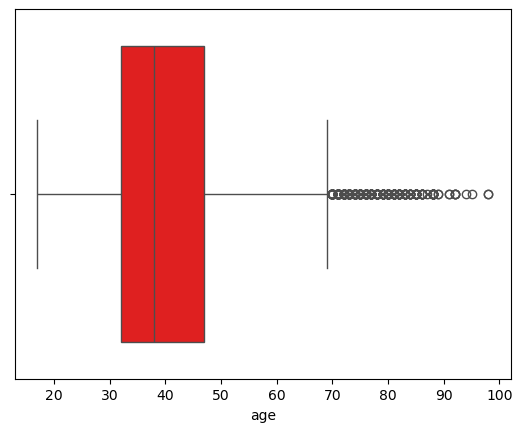

In [45]:
sns.boxplot(x='age', data=data,color='red')

In [47]:
data['age'][data['age']>70] = 70

<Axes: xlabel='age'>

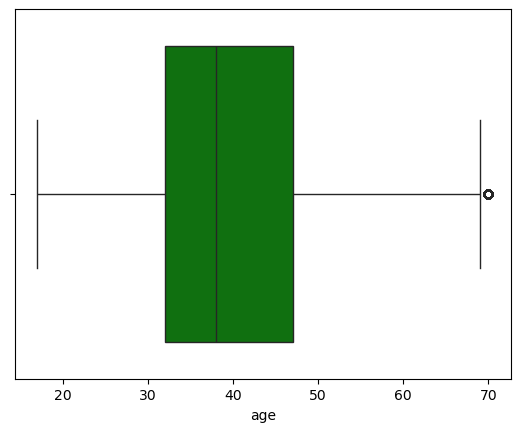

In [49]:
sns.boxplot(x='age', data=data,color='green')

In [51]:
# create age bins
bins = np.arange(10,data['age'].max()+10,10)
data['age_bins'] = pd.cut(data['age'], bins)
data['age_bins']

0        (50, 60]
1        (50, 60]
2        (30, 40]
3        (30, 40]
4        (50, 60]
           ...   
41183    (60, 70]
41184    (40, 50]
41185    (50, 60]
41186    (40, 50]
41187    (60, 70]
Name: age_bins, Length: 41188, dtype: category
Categories (6, interval[int64, right]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [53]:
no_of_prospects = data.groupby('age_bins')['response'].count().reset_index(name='no_of_prospects')
no_of_prospects

,age_bins,no_of_prospects
0,"(10, 20]",140
1,"(20, 30]",7243
2,"(30, 40]",16385
3,"(40, 50]",10240
4,"(50, 60]",6270
5,"(60, 70]",910


In [55]:
count_yes_prospects = data[data['response']==1].groupby('age_bins')['response'].count().reset_index(name='count_yes_prospects')
count_yes_prospects

,age_bins,count_yes_prospects
0,"(10, 20]",57
1,"(20, 30]",1067
2,"(30, 40]",1597
3,"(40, 50]",837
4,"(50, 60]",668
5,"(60, 70]",414


In [57]:
age_df = no_of_prospects.merge(count_yes_prospects, on='age_bins')
age_df.head()

,age_bins,no_of_prospects,count_yes_prospects
0,"(10, 20]",140,57
1,"(20, 30]",7243,1067
2,"(30, 40]",16385,1597
3,"(40, 50]",10240,837
4,"(50, 60]",6270,668


In [59]:
age_df['response_rate'] = ((age_df['count_yes_prospects']/age_df['no_of_prospects'])*100).round(2)
age_df

,age_bins,no_of_prospects,count_yes_prospects,response_rate
0,"(10, 20]",140,57,40.71
1,"(20, 30]",7243,1067,14.73
2,"(30, 40]",16385,1597,9.75
3,"(40, 50]",10240,837,8.17
4,"(50, 60]",6270,668,10.65
5,"(60, 70]",910,414,45.49


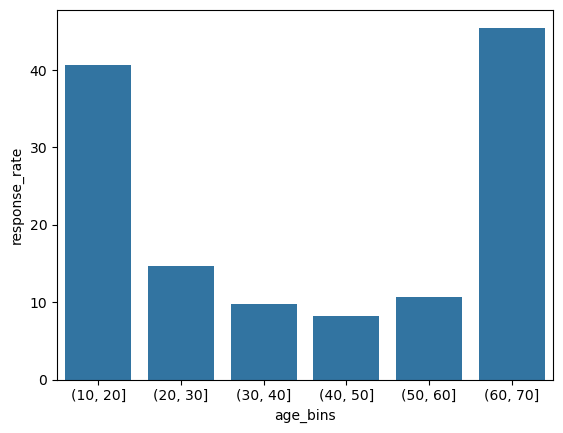

In [61]:
sns.barplot(x='age_bins', y='response_rate', data=age_df)
plt.show()

Job

In [64]:
data['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [66]:
no_of_prospects = data.groupby('job')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('job')['response'].sum().reset_index(name='count_yes_prospects')
job_df = no_of_prospects.merge(count_yes_prospects, on='job')
job_df['response_rate'] = ((job_df['count_yes_prospects']/job_df['no_of_prospects'])*100).round(2)
job_df

,job,no_of_prospects,count_yes_prospects,response_rate
0,admin.,10422,1352,12.97
1,blue-collar,9254,638,6.89
2,entrepreneur,1456,124,8.52
3,housemaid,1060,106,10.00
4,management,2924,328,11.22
5,retired,1720,434,25.23
6,self-employed,1421,149,10.49
7,services,3969,323,8.14
8,student,875,275,31.43
9,technician,6743,730,10.83


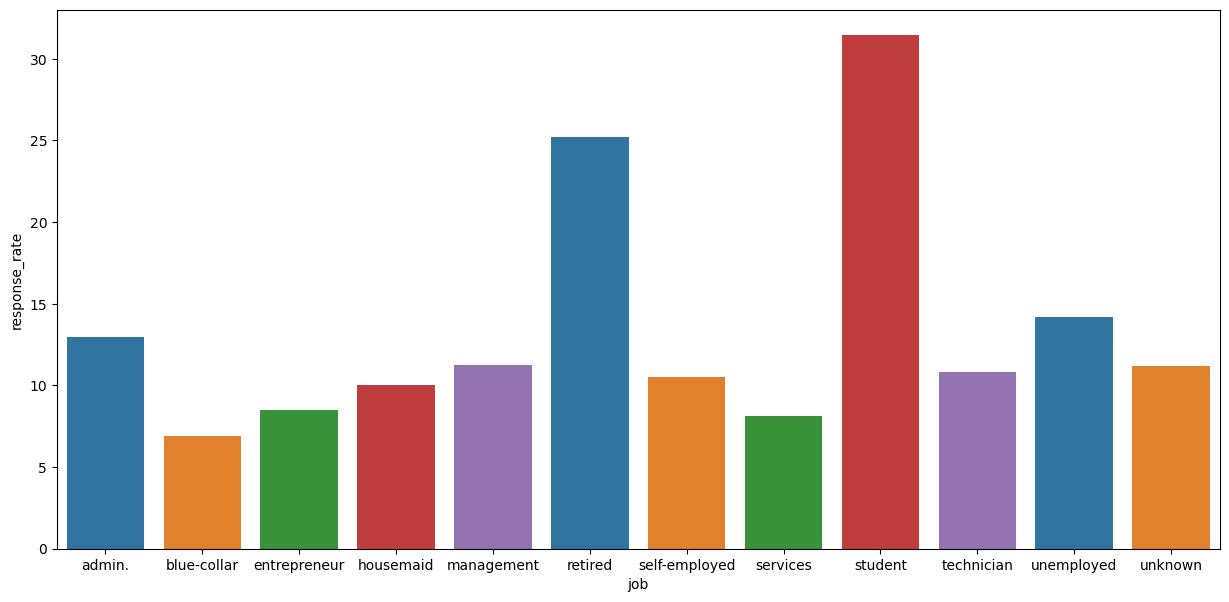

In [68]:
plt.figure(figsize=(15,7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
sns.barplot(x='job', y='response_rate', data=job_df,palette=colors)
plt.show()

In [70]:
data['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [72]:
no_of_prospects = data.groupby('marital')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('marital')['response'].sum().reset_index(name='count_yes_prospects')
marital_df = no_of_prospects.merge(count_yes_prospects, on='marital')
marital_df['response_rate'] = ((marital_df['count_yes_prospects']/marital_df['no_of_prospects'])*100).round(2)
marital_df

,marital,no_of_prospects,count_yes_prospects,response_rate
0,divorced,4612,476,10.32
1,married,24928,2532,10.16
2,single,11568,1620,14.00
3,unknown,80,12,15.00


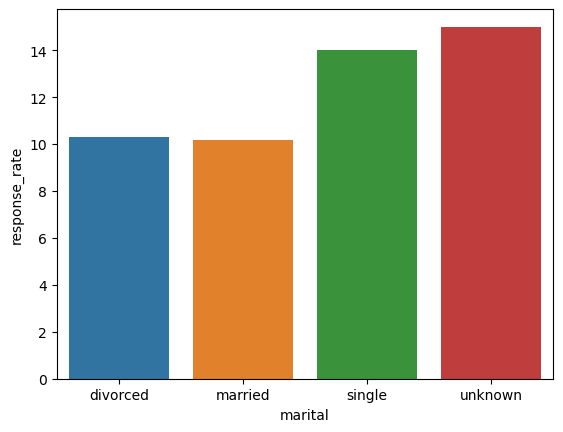

In [74]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
sns.barplot(x='marital', y='response_rate', data=marital_df,palette=colors)
plt.show()

In [76]:
data['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [78]:
data.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [80]:
data['education'].value_counts()

education
Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: count, dtype: int64

In [82]:
no_of_prospects = data.groupby('education')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('education')['response'].sum().reset_index(name='count_yes_prospects')
education_df = no_of_prospects.merge(count_yes_prospects, on='education')
education_df['response_rate'] = ((education_df['count_yes_prospects']/education_df['no_of_prospects'])*100).round(2)
education_df

,education,no_of_prospects,count_yes_prospects,response_rate
0,Primary_Education,12531,1093,8.72
1,Secondary_Education,9515,1031,10.84
2,Tertiary_Education,12168,1670,13.72
3,professional.course,5243,595,11.35
4,unknown,1731,251,14.50


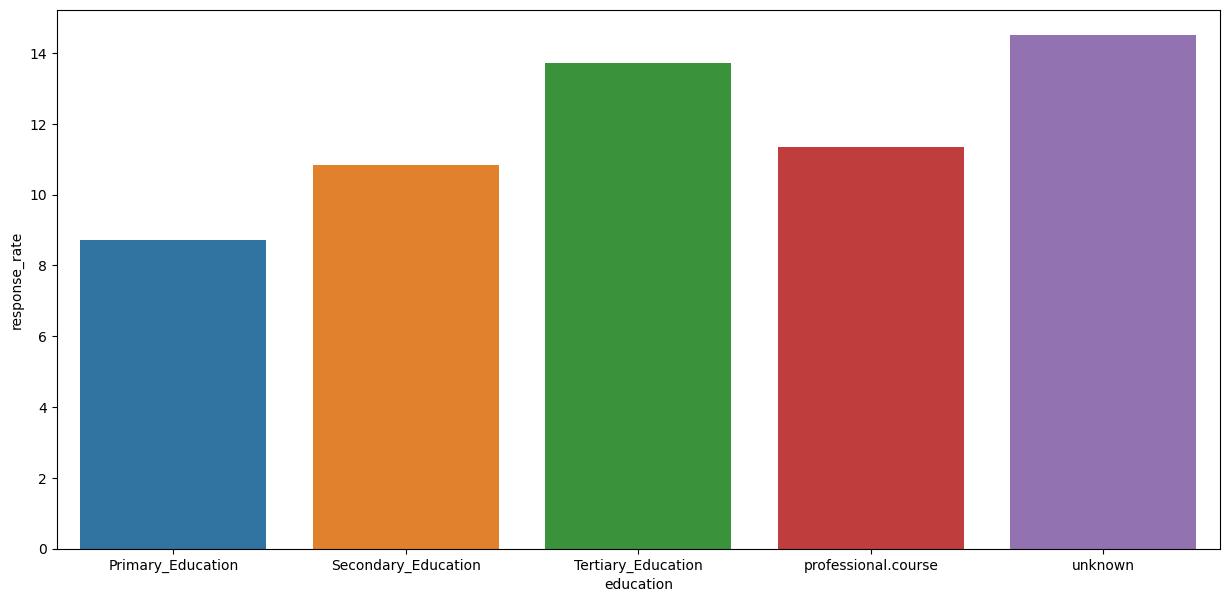

In [86]:
plt.figure(figsize=(15,7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Different colors for each bar

sns.barplot(x='education', y='response_rate', data=education_df,palette=colors)
plt.show()

In [88]:
#Previous Default
# Default column
data['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [90]:
#Housing
data['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [92]:
no_of_prospects = data.groupby('housing')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('housing')['response'].sum().reset_index(name='count_yes_prospects')
housing_df = no_of_prospects.merge(count_yes_prospects, on='housing')
housing_df['response_rate'] = ((housing_df['count_yes_prospects']/housing_df['no_of_prospects'])*100).round(2)
housing_df

,housing,no_of_prospects,count_yes_prospects,response_rate
0,no,18622,2026,10.88
1,unknown,990,107,10.81
2,yes,21576,2507,11.62


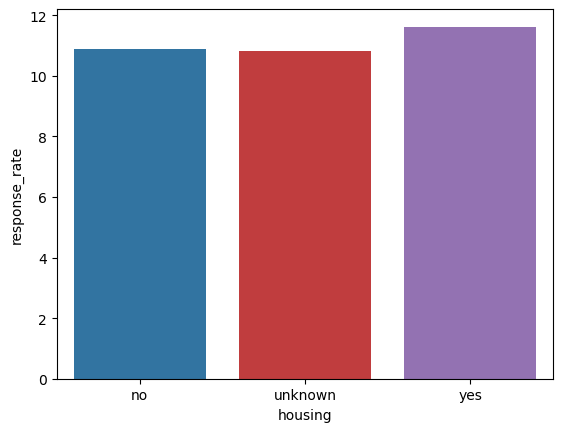

In [94]:
colors = ['#1f77b4',  '#d62728', '#9467bd']  # Different colors for each bar


sns.barplot(x='housing', y='response_rate', data=housing_df,palette=colors)
plt.show()

In [96]:
no_of_prospects = data.groupby('loan')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('loan')['response'].sum().reset_index(name='count_yes_prospects')
loan_df = no_of_prospects.merge(count_yes_prospects, on='loan')
loan_df['response_rate'] = ((loan_df['count_yes_prospects']/loan_df['no_of_prospects'])*100).round(2)
loan_df

,loan,no_of_prospects,count_yes_prospects,response_rate
0,no,33950,3850,11.34
1,unknown,990,107,10.81
2,yes,6248,683,10.93


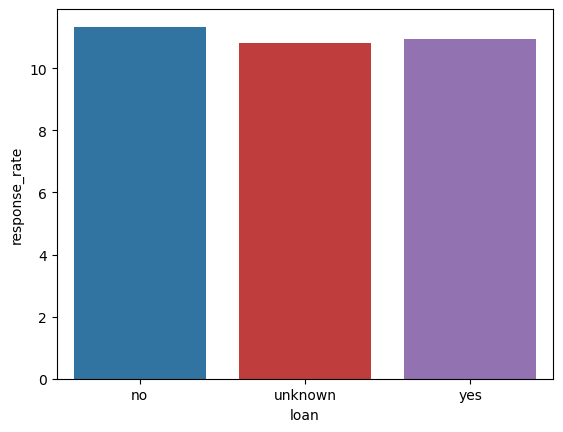

In [98]:
colors = ['#1f77b4',  '#d62728', '#9467bd']  
sns.barplot(x='loan', y='response_rate', data=loan_df,palette=colors)
plt.show()

In [100]:
#Contact
data['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [102]:
no_of_prospects = data.groupby('contact')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('contact')['response'].sum().reset_index(name='count_yes_prospects')
contact_df = no_of_prospects.merge(count_yes_prospects, on='contact')
contact_df['response_rate'] = ((contact_df['count_yes_prospects']/contact_df['no_of_prospects'])*100).round(2)
contact_df

,contact,no_of_prospects,count_yes_prospects,response_rate
0,cellular,26144,3853,14.74
1,telephone,15044,787,5.23


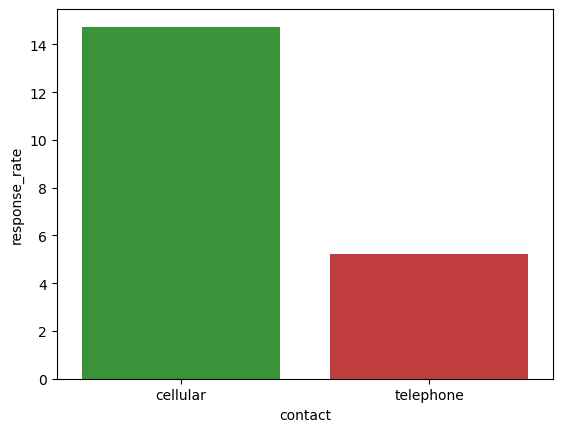

In [108]:
colors = ['#2ca02c', '#d62728', '#9467bd']
sns.barplot(x='contact', y='response_rate', data=contact_df,palette=colors)
plt.show()

In [110]:
#Month
data['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [112]:
no_of_prospects = data.groupby('month')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('month')['response'].sum().reset_index(name='count_yes_prospects')
month_df = no_of_prospects.merge(count_yes_prospects, on='month')
month_df['response_rate'] = ((month_df['count_yes_prospects']/month_df['no_of_prospects'])*100).round(2)
month_df

,month,no_of_prospects,count_yes_prospects,response_rate
0,apr,2632,539,20.48
1,aug,6178,655,10.60
2,dec,182,89,48.90
3,jul,7174,649,9.05
4,jun,5318,559,10.51
5,mar,546,276,50.55
6,may,13769,886,6.43
7,nov,4101,416,10.14
8,oct,718,315,43.87
9,sep,570,256,44.91


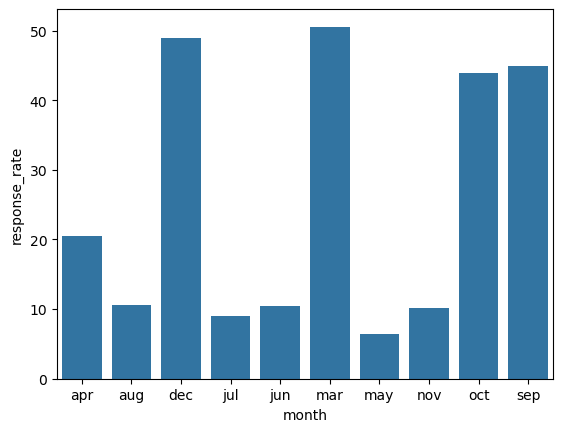

In [114]:
sns.barplot(x='month', y='response_rate', data=month_df)
plt.show()

In [116]:
data['day_of_week'].value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [118]:
no_of_prospects = data.groupby('day_of_week')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('day_of_week')['response'].sum().reset_index(name='count_yes_prospects')
day_of_week_df = no_of_prospects.merge(count_yes_prospects, on='day_of_week')
day_of_week_df['response_rate'] = ((day_of_week_df['count_yes_prospects']/day_of_week_df['no_of_prospects'])*100).round(2)
day_of_week_df

,day_of_week,no_of_prospects,count_yes_prospects,response_rate
0,fri,7827,846,10.81
1,mon,8514,847,9.95
2,thu,8623,1045,12.12
3,tue,8090,953,11.78
4,wed,8134,949,11.67


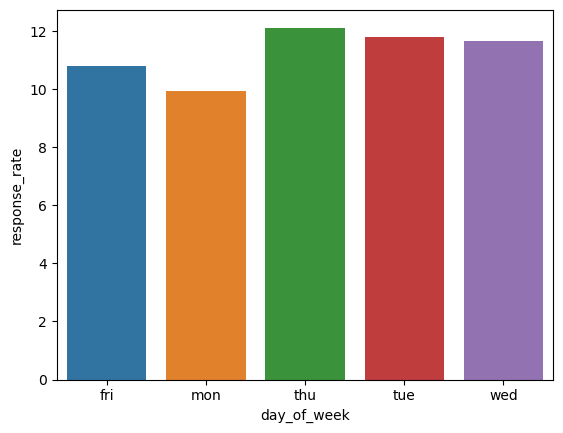

In [122]:
colors=['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728' ,
 '#9467bd' ,
 '#8c564b' ,
 '#e377c2' ,
 '#7f7f7f',
 '#bcbd22',
 '#17becf']
sns.barplot(x='day_of_week', y='response_rate', data=day_of_week_df,palette=colors)
plt.show()

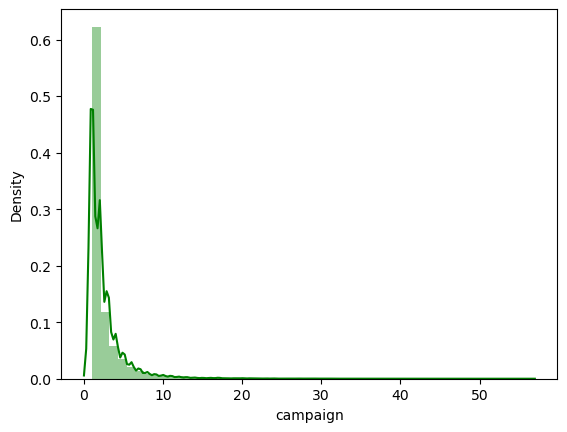

In [130]:
#Campaign
sns.distplot(data['campaign'],color='green')
plt.show()

<Axes: xlabel='campaign'>

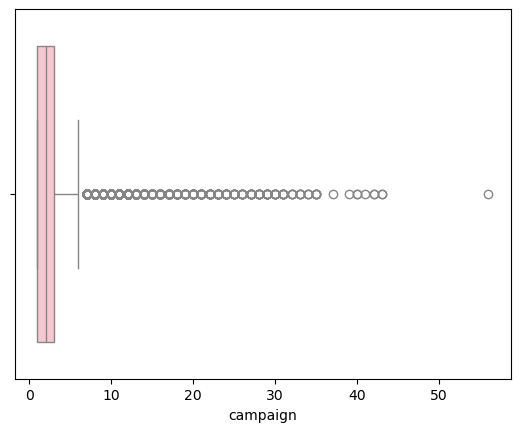

In [132]:
# Creating Box plot 
sns.boxplot(x='campaign', data=data,color='pink')

In [134]:
data['campaign'][data['campaign']>10] = 10
no_of_prospects = data.groupby('campaign')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('campaign')['response'].sum().reset_index(name='count_yes_prospects')
campaign_df = no_of_prospects.merge(count_yes_prospects, on='campaign')
campaign_df['response_rate'] = ((campaign_df['count_yes_prospects']/campaign_df['no_of_prospects'])*100).round(2)
campaign_df

,campaign,no_of_prospects,count_yes_prospects,response_rate
0,1,17642,2300,13.04
1,2,10570,1211,11.46
2,3,5341,574,10.75
3,4,2651,249,9.39
4,5,1599,120,7.50
5,6,979,75,7.66
6,7,629,38,6.04
7,8,400,17,4.25
8,9,283,17,6.01
9,10,1094,39,3.56


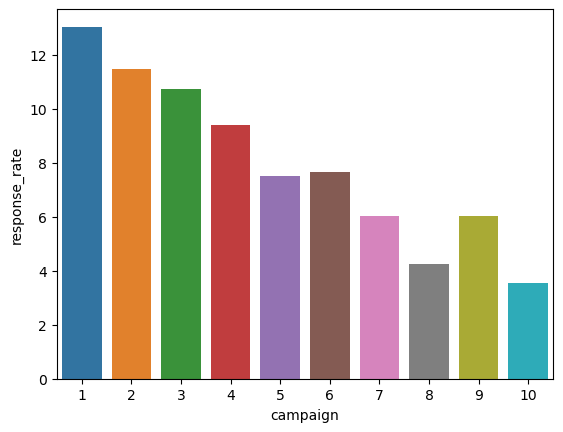

In [139]:
colors=['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728' ,
 '#9467bd' ,
 '#8c564b' ,
 '#e377c2' ,
 '#7f7f7f',
 '#bcbd22',
 '#17becf']
sns.barplot(x='campaign', y='response_rate', data=campaign_df,palette=colors)
plt.show()

In [141]:
data['pdays'].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [143]:
data['pdays'][data['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])] = 'contacted_in_first_10_days'
data['pdays'][data['pdays']==999] = 'contacted_first_time'
data['pdays'][~data['pdays'].isin(['contacted_in_first_10_days', 'contacted_first_time'])] = 'contacted_after_10_days'
data['pdays'].value_counts()

pdays
contacted_first_time          39673
contacted_in_first_10_days     1311
contacted_after_10_days         204
Name: count, dtype: int64

In [145]:
no_of_prospects = data.groupby('pdays')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('pdays')['response'].sum().reset_index(name='count_yes_prospects')
pdays_df = no_of_prospects.merge(count_yes_prospects, on='pdays')
pdays_df['response_rate'] = ((pdays_df['count_yes_prospects']/pdays_df['no_of_prospects'])*100).round(2)
pdays_df

,pdays,no_of_prospects,count_yes_prospects,response_rate
0,contacted_after_10_days,204,116,56.86
1,contacted_first_time,39673,3673,9.26
2,contacted_in_first_10_days,1311,851,64.91


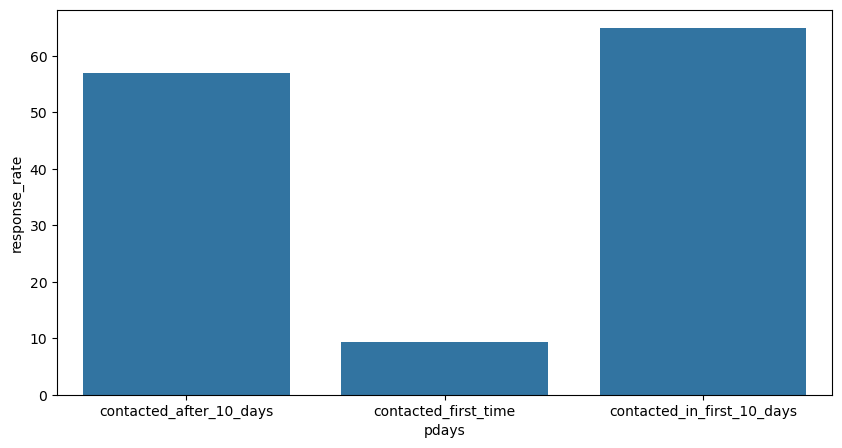

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(x='pdays', y='response_rate', data=pdays_df)
plt.show()

NameError: name 'y_test' is not defined